![MLU Logo](../../data/MLU_Logo.png)

In this exercise, we will investigate the effect of bagging on overfitting.
Let's first create our dataset.

__Dataset:__

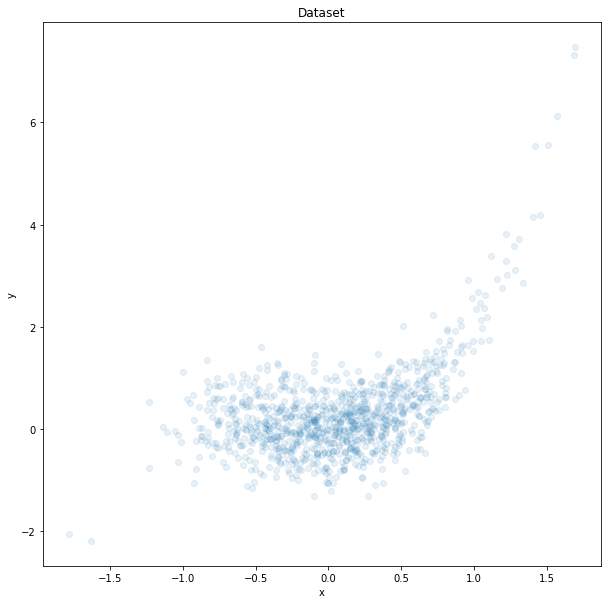

In [1]:
# Build and plot a test dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(1701)

x = np.random.randn(1000)/2
y = x**2+x**3 + 0.5*np.random.randn(1000)

plt.figure(figsize=(10,10))
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,y,alpha=0.1)
plt.show()

__Decision Tree:__

First, we will use a simple decision tree with max_depth=8

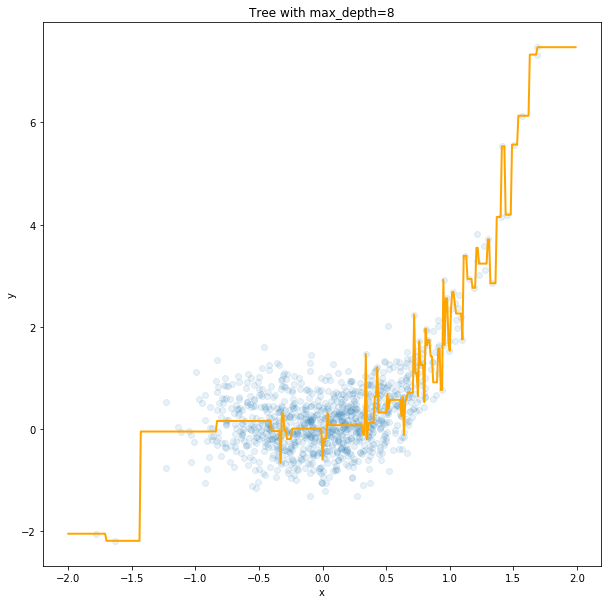

In [2]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 8)
model.fit(np.array(x).reshape(-1,1),y)

xp = np.arange(-2.0, 2.0, 0.01)
yp = model.predict(np.array(xp).reshape(-1,1))

# Plot the results
plt.figure(figsize = (10,10))
plt.title("Tree with max_depth=8")
plt.scatter(x,y,alpha=0.1)
plt.plot(xp,yp,linewidth=2,color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

__Bagging:__

Let's increase the number of trees to 100 and take the average of them.

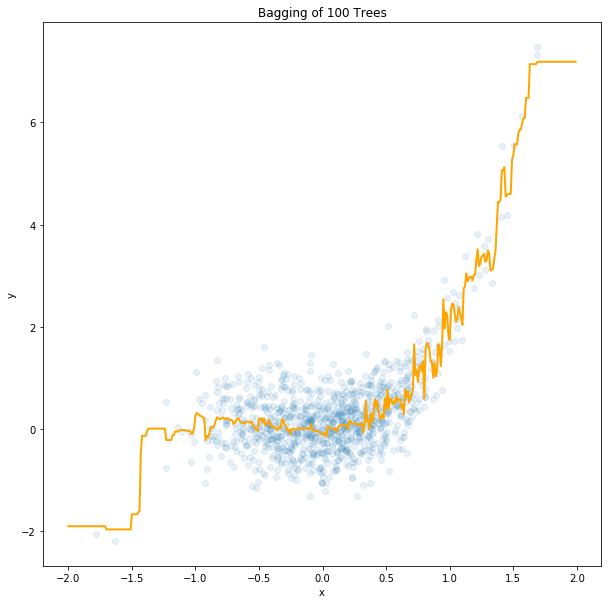

In [3]:
from sklearn.utils import resample

# bag a bunch of models (done by hand for fun)
k = 100        # Number of Trees to learn
n_prime = 1000  # Number of samples in data subsets

yp_bagged = np.zeros(len(xp))
for i in range(k) :
    xr, yr = resample(x,y, n_samples = n_prime)
    model = DecisionTreeRegressor(max_depth = 8)
    model.fit(np.array(xr).reshape(-1,1),yr)
    yp_bagged += model.predict(np.array(xp).reshape(-1,1))/float(k)
    
# Plot the results
plt.figure(figsize = (10,10))
plt.title("Bagging of 100 Trees")
plt.scatter(x,y,alpha=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xp,yp_bagged,linewidth=2,color='orange')
plt.show()

Reduce the number of samples per tree to 100. It was 1000 before.

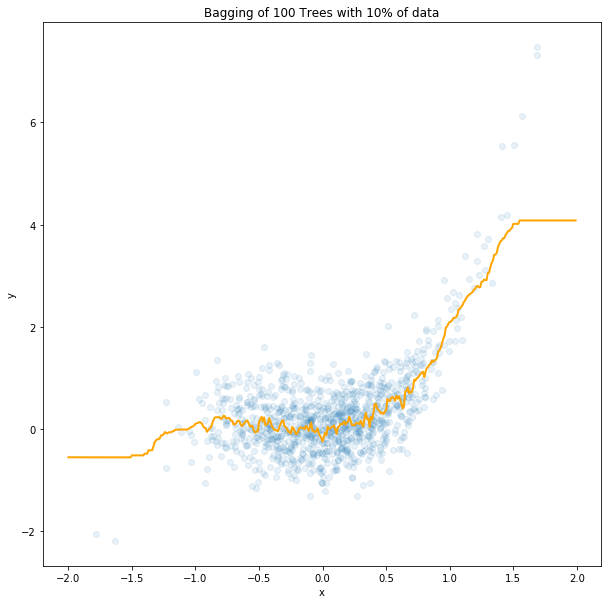

In [4]:
from sklearn.utils import resample

# bag a bunch of models (done by hand for fun)
k = 100        # Number of Trees to learn
n_prime = 100  # Number of samples in data subsets

yp_bagged = np.zeros(len(xp))
for i in range(k) :
    xr, yr = resample(x,y, n_samples = n_prime)
    model = DecisionTreeRegressor(max_depth = 8)
    model.fit(np.array(xr).reshape(-1,1),yr)
    yp_bagged += model.predict(np.array(xp).reshape(-1,1))/float(k)
    
# Plot the results
plt.figure(figsize = (10,10))
plt.title("Bagging of 100 Trees with 10% of data")
plt.scatter(x,y,alpha=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xp,yp_bagged,linewidth=2,color='orange')
plt.show()